In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score, accuracy_score

In [6]:
df = pd.read_csv("../Raw/metacritic_games.csv")
test = df.copy()

In [7]:
df["number_players"] = df["number_players"].fillna("no se sabe")
df["rating"] = df["rating"].fillna("nada")
df["genre"] = df["genre"].fillna("otro")
df["developer"] = df["developer"].fillna("Desconocido")

In [8]:
test = df.groupby("genre")["user_score"].mean().reset_index()
test.columns = ["genre","media"]
test2 = df.groupby("genre")["metascore"].mean().reset_index()
test2.columns = ["genre","media"]

In [9]:
df['Media_usuario'] = np.nan
df['Media_meta'] = np.nan

for _, row in test.iterrows():
    categoria = row['genre']
    media_correspondiente = row['media']
    df.loc[df['genre'] == categoria, 'Media_usuario'] = media_correspondiente

for _, row in test2.iterrows():
    categoria = row['genre']
    media_correspondiente = row['media']
    df.loc[df['genre'] == categoria, 'Media_meta'] = media_correspondiente

In [10]:
label_encoder = LabelEncoder()
df["platform"] = label_encoder.fit_transform(df["platform"])
df["genre"] = label_encoder.fit_transform(df["genre"])
df["number_players"] = label_encoder.fit_transform(df["number_players"])
df["rating"] = label_encoder.fit_transform(df["rating"])

filas_con_nan = df[df.isna().any(axis=1)]
filas_con_nan

,game,platform,developer,genre,number_players,rating,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score,Media_usuario,Media_meta


In [11]:
df = df.drop(["developer","release_date","game"], axis=1)

In [12]:
filas_con_nan = df[df.isna().any(axis=1)]
filas_con_nan

,platform,genre,number_players,rating,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score,Media_usuario,Media_meta


In [13]:
#sacar la media de reviews por genero

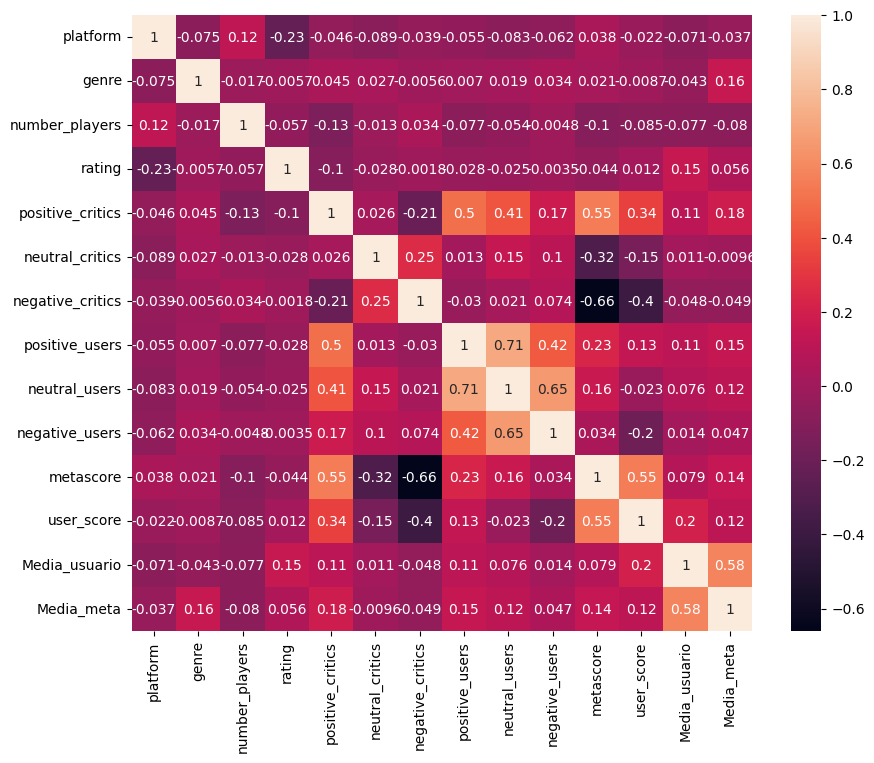

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True);

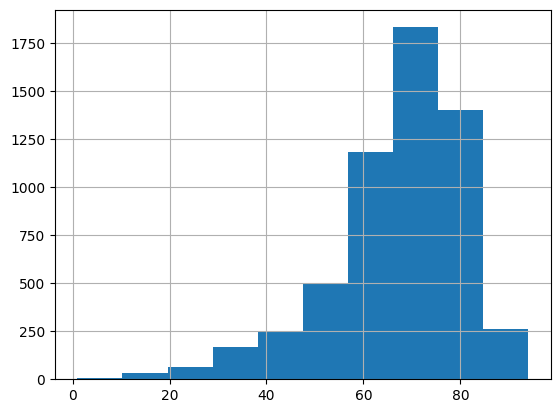

In [15]:
df["user_score"].hist();

In [16]:
test = df.tail(1000)
df = df.drop(df.tail(1000).index)
train = df.copy()

In [17]:
#vamos a probar una regresion lineal, ya tenemos nuestra X e y
def regression(train,test, target):
    train = train.select_dtypes(exclude=['object'])
    test = test.select_dtypes(exclude=['object'])
    obj = train[target]
    obj_test = test[target]
    test = test.drop([target],axis=1)
    train = train.drop([target],axis=1)
    model = LinearRegression()

    X = train
    y = obj

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1)
    
    model.fit(X_train,y_train)

    pred = model.predict(test)

    print(X_train.shape)
    print(y_train.shape)
    print(pred.shape)
    print(test.shape)

    print("Media Target: ", y.mean())
    print("Intercept: ",model.intercept_)
    print("Model: ", model.coef_)
    print("R2", round(r2_score(obj_test, pred),3))
    print("MAE", round(mean_absolute_error(obj_test, pred),3))
    print("MAPE", round(mean_absolute_percentage_error(obj_test, pred),3))
    print("MSE", round(mean_squared_error(obj_test, pred),3))
    print("RMSE", round(np.sqrt(mean_squared_error(obj_test, pred)),3))
    filename = 'modelo_regression_lineal'

    with open(filename, 'wb') as archivo_salida:
        pickle.dump(model, archivo_salida)

In [18]:
#vamos a probar una regresion lineal, ya tenemos nuestra X e y
def polynominal(train,test, target):
    train = train.select_dtypes(exclude=['object'])
    test = test.select_dtypes(exclude=['object'])
    obj = train[target]
    obj_test = test[target]
    test = test.drop([target],axis=1)
    train = train.drop([target],axis=1)
    model = LinearRegression()

    X = train
    y = obj

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1)
    
    poly = PolynomialFeatures(degree=2)

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scal = scaler.transform(X_train)
    X_test_scal = scaler.transform(test)
    poly.fit(X_train_scal)
    X_poly_train = poly.transform(X_train_scal)
    X_poly_test = poly.transform(X_test_scal)

    pol_reg4_reg = Ridge(alpha=0.1)
    pol_reg4_reg.fit(X_poly_train, y_train)

    pred = pol_reg4_reg.predict(X_poly_test)



    print(X_train.shape)
    print(y_train.shape)
    print(pred.shape)
    print(test.shape)

    print("Media Target: ", y.mean())
    print("R2", round(r2_score(obj_test, pred),3))
    print("MAE", round(mean_absolute_error(obj_test, pred),3))
    print("MAPE", round(mean_absolute_percentage_error(obj_test, pred),3))
    print("MSE", round(mean_squared_error(obj_test, pred),3))
    print("RMSE", round(np.sqrt(mean_squared_error(obj_test, pred)),3))
    filename = 'modelo_regression_polynominal'

    with open(filename, 'wb') as archivo_salida:
        pickle.dump(model, archivo_salida)

In [19]:
regression(train, test, "user_score")

(4698, 13)
(4698,)
(1000,)
(1000, 13)
Media Target:  67.79208342200468
Intercept:  10.988452687070648
Model:  [-0.34113705 -0.0047502  -0.03557442  0.09119844  0.04222134  0.10140517
 -0.26986231  0.01793047 -0.0564418  -0.03387265  0.57010295  0.89999329
 -0.61103327]
R2 0.257
MAE 9.137
MAPE 0.249
MSE 163.832
RMSE 12.8


In [20]:
polynominal(train, test, "user_score")

(4698, 13)
(4698,)
(1000,)
(1000, 13)
Media Target:  67.79208342200468
R2 0.299
MAE 8.865
MAPE 0.228
MSE 154.662
RMSE 12.436


In [21]:
def grid_rfr(train,test, target):
    train = train.select_dtypes(exclude=['object'])
    test = test.select_dtypes(exclude=['object'])
    obj = train[target]
    obj_test = test[target]
    test = test.drop([target],axis=1)
    train = train.drop([target],axis=1)


    X = train
    y = obj

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1)
    
    pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
    ])

    parameters = {
        'scaler__with_mean': [True, False],
        'scaler__with_std': [True, False],
        'regressor__n_estimators': [50, 100, 200],
        'regressor__max_depth': [None, 5, 10],
        'regressor__min_samples_split': [2, 5, 10]
    }

    rfr_gs = GridSearchCV(estimator=pipe, param_grid=parameters, cv=3, scoring="accuracy", verbose=3, n_jobs=-1)
    rfr_gs.fit(X_train, y_train)
    final_rfc = rfr_gs.best_estimator_
    final_rfc.fit(X_train, y_train)
    pred = final_rfc.predict(test)


    print("Media Target: ", y.mean())
    print("R2", round(r2_score(obj_test, pred),3))
    print("MAE", round(mean_absolute_error(obj_test, pred),3))
    print("MAPE", round(mean_absolute_percentage_error(obj_test, pred),3))
    print("MSE", round(mean_squared_error(obj_test, pred),3))
    print("RMSE", round(np.sqrt(mean_squared_error(obj_test, pred)),3))

    filename = 'modelo_regression_RFR'

    with open(filename, 'wb') as archivo_salida:
        pickle.dump(rfr_gs, archivo_salida)

In [22]:
grid_rfr(train, test, "user_score")

Fitting 3 folds for each of 108 candidates, totalling 324 fits


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Media Target:  67.79208342200468
R2 0.513
MAE 7.41
MAPE 0.188
MSE 107.34
RMSE 10.361


In [23]:
def grid_gbr(train,test, target):
    train = train.select_dtypes(exclude=['object'])
    test = test.select_dtypes(exclude=['object'])
    obj = train[target]
    obj_test = test[target]
    test = test.drop([target],axis=1)
    train = train.drop([target],axis=1)


    X = train
    y = obj

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1)
    
    pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', GradientBoostingRegressor())
    ])

    parameters = {
            "regressor__n_estimators":[50,100,150],
            "regressor__max_depth": [2,3,4,5],
            "regressor__max_features": [2,3,4],
            "regressor__learning_rate":[0.01,0.1,0.5]
            }

    gbr_gs = GridSearchCV(estimator=pipe, param_grid=parameters, cv=3, scoring="accuracy", verbose=3, n_jobs=-1)
    gbr_gs.fit(X_train, y_train)
    final = gbr_gs.best_estimator_
    final.fit(X_train, y_train)
    pred = final.predict(test)


    print("Media Target: ", y.mean())
    print("R2", round(r2_score(obj_test, pred),3))
    print("MAE", round(mean_absolute_error(obj_test, pred),3))
    print("MAPE", round(mean_absolute_percentage_error(obj_test, pred),3))
    print("MSE", round(mean_squared_error(obj_test, pred),3))
    print("RMSE", round(np.sqrt(mean_squared_error(obj_test, pred)),3))

    filename = 'modelo_regression_GBR'

    with open(filename, 'wb') as archivo_salida:
        pickle.dump(final, archivo_salida)

In [24]:
grid_gbr(train, test, "user_score")

Fitting 3 folds for each of 108 candidates, totalling 324 fits


Media Target:  67.79208342200468
R2 0.031
MAE 10.545
MAPE 0.306
MSE 213.632
RMSE 14.616


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [25]:
def grid_knn(train,test, target):
    train = train.select_dtypes(exclude=['object'])
    test = test.select_dtypes(exclude=['object'])
    obj = train[target]
    obj_test = test[target]
    test = test.drop([target],axis=1)
    train = train.drop([target],axis=1)


    X = train
    y = obj

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1)
    
    pipe = Pipeline([
    ('scaler', StandardScaler()),
    ("selectkbest", SelectKBest()),
    ('regressor', KNeighborsRegressor())
    ])

    parameters = {
        'selectkbest__k':np.arange(5,15),
        'regressor__n_neighbors': np.arange(5,15)
        }

    knr_gs = GridSearchCV(estimator=pipe, param_grid=parameters, cv=3, scoring="accuracy", verbose=3, n_jobs=-1)
    knr_gs.fit(X_train, y_train)
    final = knr_gs.best_estimator_
    final.fit(X_train, y_train)
    pred = final.predict(test)


    print("Media Target: ", y.mean())
    print("R2", round(r2_score(obj_test, pred),3))
    print("MAE", round(mean_absolute_error(obj_test, pred),3))
    print("MAPE", round(mean_absolute_percentage_error(obj_test, pred),3))
    print("MSE", round(mean_squared_error(obj_test, pred),3))
    print("RMSE", round(np.sqrt(mean_squared_error(obj_test, pred)),3))

    filename = 'modelo_regression_KNR'

    with open(filename, 'wb') as archivo_salida:
        pickle.dump(final, archivo_salida)

In [26]:
grid_knn(train, test, "user_score")

Fitting 3 folds for each of 100 candidates, totalling 300 fits


Media Target:  67.79208342200468
R2 0.271
MAE 9.391
MAPE 0.235
MSE 160.664
RMSE 12.675


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Usuar

In [27]:
def grid_SVR(train,test, target):
    train = train.select_dtypes(exclude=['object'])
    test = test.select_dtypes(exclude=['object'])
    obj = train[target]
    obj_test = test[target]
    test = test.drop([target],axis=1)
    train = train.drop([target],axis=1)


    X = train
    y = obj

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1)
    
    pipe = Pipeline([
    ('scaler', StandardScaler()),
    ("selectkbest", SelectKBest()),
    ('regressor', SVR())
    ])

    parameters = {
        'selectkbest__k':np.arange(5,15),
        'regressor__C': [0.1,1,10]
        }
    
    svr_gs = GridSearchCV(estimator=pipe, param_grid=parameters, cv=3, scoring="accuracy", verbose=3, n_jobs=-1)
    svr_gs.fit(X_train, y_train)
    final = svr_gs.best_estimator_
    final.fit(X_train, y_train)
    pred = final.predict(test)


    print("Media Target: ", y.mean())
    print("R2", round(r2_score(obj_test, pred),3))
    print("MAE", round(mean_absolute_error(obj_test, pred),3))
    print("MAPE", round(mean_absolute_percentage_error(obj_test, pred),3))
    print("MSE", round(mean_squared_error(obj_test, pred),3))
    print("RMSE", round(np.sqrt(mean_squared_error(obj_test, pred)),3))

    filename = 'modelo_regression_SVR'

    with open(filename, 'wb') as archivo_salida:
        pickle.dump(final, archivo_salida)

In [28]:
grid_SVR(train, test, "user_score")

Fitting 3 folds for each of 30 candidates, totalling 90 fits


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
9 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Usuario\

Media Target:  67.79208342200468
R2 0.082
MAE 9.745
MAPE 0.291
MSE 202.426
RMSE 14.228


In [45]:
def kmeans(train,test, target):
    train = train.select_dtypes(exclude=['object'])
    test = test.select_dtypes(exclude=['object'])
    obj = train[target]
    obj_test = test[target]
    test = test.drop([target],axis=1)
    train = train.drop([target],axis=1)

    kmeans = KMeans()
        
    X = train
    y = obj

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1)

    # Definir el modelo de PCA
    pca = PCA()

    # Definir el modelo de KMeans
    kmeans = KMeans(n_init=10)

    # Definir la tubería con PCA seguido de KMeans
    pipe = Pipeline([
        ('pca', pca),
        ('kmeans', kmeans)
    ])

    # Definir el espacio de búsqueda de hiperparámetros
    param_grid = {
        'pca__n_components': [2, 5, 10],  # Ajusta según la cantidad deseada de componentes principales
        'kmeans__n_clusters': [5, 10, 15, 20]  # Ajusta los valores según sea necesario
    }

    # Configurar Grid Search con validación cruzada
    grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='adjusted_rand_score')  # Ajusta la métrica según tu problema

    # Entrenar el modelo con el conjunto de entrenamiento
    grid_search.fit(X_train)

    # Obtener el mejor modelo y sus hiperparámetros
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    predictions = best_model.predict(X_test)

    print("Mejores hiperparámetros:", best_params)
    print("Predicciones en el conjunto de prueba:", predictions)
    print("Resultados de la validación cruzada:")
    print(grid_search.cv_results_)

    inercia = best_model.named_steps['kmeans'].inertia_
    print("Inercia del modelo de KMeans:", inercia)



    """with open(filename, 'wb') as archivo_salida:
        pickle.dump(final, archivo_salida)"""

In [46]:
kmeans(train, test, "user_score")

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 808, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 80

Mejores hiperparámetros: {'kmeans__n_clusters': 5, 'pca__n_components': 2}
Predicciones en el conjunto de prueba: [0]
Resultados de la validación cruzada:
{'mean_fit_time': array([0.07294164, 0.06254511, 0.06985712, 0.0684576 , 0.0828939 ,
       0.0861445 , 0.0826004 , 0.09897065, 0.11119914, 0.09502373,
       0.12176919, 0.13643184]), 'std_fit_time': array([0.02261176, 0.00189257, 0.00443594, 0.00398129, 0.00654236,
       0.00493717, 0.00716175, 0.00733467, 0.00445568, 0.0049205 ,
       0.00730409, 0.00612085]), 'mean_score_time': array([0.00080905, 0.00030575, 0.00085292, 0.00048056, 0.0005137 ,
       0.00091572, 0.00072584, 0.00050144, 0.00065775, 0.00040274,
       0.00049086, 0.00044127]), 'std_score_time': array([0.00040461, 0.00040739, 0.00043065, 0.00059964, 0.00065219,
       0.00049665, 0.00061378, 0.00044725, 0.00054573, 0.00049326,
       0.0006165 , 0.00054226]), 'param_kmeans__n_clusters': masked_array(data=[5, 5, 5, 10, 10, 10, 15, 15, 15, 20, 20, 20],
             